# Project 3 INF264

Author: Johanna Jøsang (fak006)

In [1]:
# Imports
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import random
import timeit
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# LeNet-5 imports
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils

In [2]:
# Load data
label_data = np.genfromtxt('handwritten_digits_labels.csv', delimiter=',')
image_data = np.genfromtxt('handwritten_digits_images.csv', delimiter=',')
image_data = image_data.reshape(image_data.shape[0], 28, 28) # reshaping data

## Visualisation and preprocessing

In order to get a better understanding of the data I have been given, I start by gathering information about it.
First I would like to get a look at the shape of the data.

In [3]:
print("Label data shape:", label_data.shape)
print("Image data shape:", image_data.shape)

Label data shape: (70000,)
Image data shape: (70000, 28, 28)


As expected, the label dataset is a simple array with 70000 values, while the image dataset has 70000 2d arrays represetning the digit image.

Just to visalize the data for myself I print out a random image and its corresponding label.

At index 66473 there is a 9.0


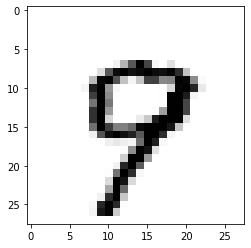

In [4]:
data_index = random.randint(0, label_data.size)
img = image_data[data_index]
plt.imshow(img, cmap="Greys")
print("At index", data_index, "there is a", label_data[data_index])

### Digit distribution

In order to find out how the data is distributed between the 10 digits, I print out the frequency, percentages and a histogram to see the distribution.

In [5]:
# Count number of examples for each digit
label_counter = collections.Counter(label_data)
print(label_counter)

# Print out the percentages for each digit
label_data_size = label_data.size
for i in range(10):
    percentage = (label_counter[i] / label_data_size) * 100
    print(i, ": ", "%.2f" % percentage, "%")
    
# Print min and max, which can easily be count ince label_counter is sorted by frequency
print("Min freq is 5 with", "%.2f" % ((label_counter[5] / label_data_size) * 100), "%")
print("Max freq is 1 with", "%.2f" % ((label_counter[1] / label_data_size) * 100), "%")

Counter({1.0: 7877, 7.0: 7293, 3.0: 7141, 2.0: 6990, 9.0: 6958, 0.0: 6903, 6.0: 6876, 8.0: 6825, 4.0: 6824, 5.0: 6313})
0 :  9.86 %
1 :  11.25 %
2 :  9.99 %
3 :  10.20 %
4 :  9.75 %
5 :  9.02 %
6 :  9.82 %
7 :  10.42 %
8 :  9.75 %
9 :  9.94 %
Min freq is 5 with 9.02 %
Max freq is 1 with 11.25 %


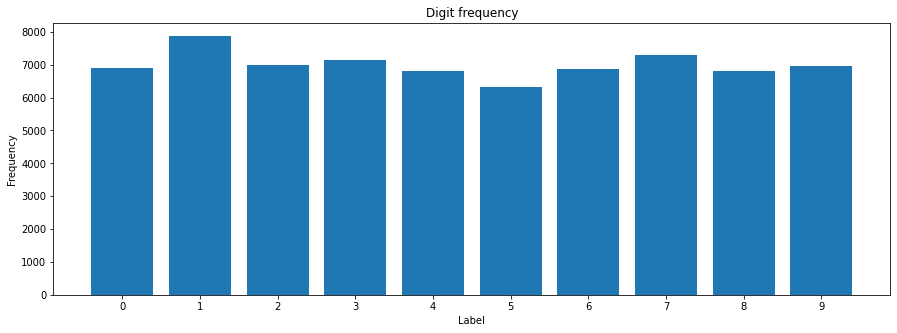

In [6]:
# Histogram
names = list(label_counter.keys())
values = list(label_counter.values())
fig = plt.figure(figsize=(15,5))
plt.bar(names, values)
plt.xticks(np.arange(0, 10))
plt.ylabel('Frequency')
plt.xlabel('Label')
plt.title("Digit frequency");

All digits have about 10% of the data, so it does not seem like the dataset needs to be balanced. The least frequent digit was 5 (9.02 %) and the most frequent was 1 (11.25 %). If our trained classifiers become much worse at categorizing 5s compared to 1s then we can perhaps go back and balance the data.

In [7]:
seed = 123
X_train_val, X_test, y_train_val, y_test = train_test_split(image_data, label_data, test_size=0.1, shuffle=True, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=True, random_state=seed)


In [8]:
def reshape_3d_to_2d(data_3d):
    number_of_samples, x_dim, y_dim = data_3d.shape
    dataset_2d = data_3d.reshape((number_of_samples,x_dim*y_dim))
    return dataset_2d

X_train_2d = reshape_3d_to_2d(X_train)
X_val_2d = reshape_3d_to_2d(X_val)
X_train_val_2d = reshape_3d_to_2d(X_train_val)

In [9]:
clf = RandomForestClassifier()
clf.fit(X_train_2d, y_train)

#print(clf.predict([[0, 0, 0, 0]]))

RandomForestClassifier()

In [10]:
X_val_2d = reshape_3d_to_2d(X_val)
print(clf.score(X_val_2d, y_val))

0.9662698412698413


In [11]:
def kFold_cross_validation(X_train_val, y_train_val):
    kf = KFold(n_splits=5)
    score_count = []
    iteration_counter = 1
    for train_index, test_index in kf.split(X_train_val):
        X_train, X_val = X_train_val[train_index], X_train_val[test_index]
        y_train, y_val = y_train_val[train_index], y_train_val[test_index]
        clf.fit(X_train, y_train)
        iteration_score = clf.score(X_val, y_val)
        print("Iteration", iteration_counter, "score:", iteration_score)
        score_count.append(iteration_score)
    mean_score = np.mean(score_count)
    print("Mean score:", mean_score)
    return mean_score

In [12]:
X_train_val_2d = reshape_3d_to_2d(X_train_val)

mean_1 = kFold_cross_validation(X_train_val_2d, y_train_val)

Iteration 1 score: 0.9705555555555555
Iteration 1 score: 0.9667460317460318
Iteration 1 score: 0.9646031746031746
Iteration 1 score: 0.9673809523809523
Iteration 1 score: 0.9696031746031746
Mean score: 0.9677777777777777


In [13]:
print(cross_val_score(clf, X_train_val_2d, y_train_val))

[0.97015873 0.96492063 0.96730159 0.96706349 0.96809524]


In [14]:
print(np.mean([0.965, 0.96865079, 0.9681746, 0.96801587, 0.96785714]))

0.96753968


In [15]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [20]:
val_acc_at_depth = {} # Dictionary for keeping track of depth vs accuracy
train_acc_at_depth = {} # Dictionary for keeping track of depth vs accuracy
for i in range(1,30):
    clf = RandomForestClassifier(max_depth = i)
    #cross_val_scores = cross_val_score(clf, X_train_val_2d, y_train_val)
    clf.fit(X_train_2d, y_train)
    train_score = clf.score(X_train_2d, y_train)
    val_score = clf.score(X_val_2d, y_val)
    #mean_cross_val_score = np.mean(cross_val_scores)
    print("Precision at depth", i , "is val:", val_score, "train", train_score)
    #acc_at_depth[i] = mean_cross_val_score 
    train_acc_at_depth[i] = train_score
    val_acc_at_depth[i] = val_score

Precision at depth 1 is val: 0.5082539682539683 train 0.5174603174603175
Precision at depth 2 is val: 0.6359523809523809 train 0.6353968253968254
Precision at depth 3 is val: 0.7478571428571429 train 0.7492063492063492
Precision at depth 4 is val: 0.8105555555555556 train 0.8116666666666666
Precision at depth 5 is val: 0.858015873015873 train 0.8636904761904762
Precision at depth 6 is val: 0.8861904761904762 train 0.8919444444444444
Precision at depth 7 is val: 0.9075396825396825 train 0.9176587301587301
Precision at depth 8 is val: 0.9245238095238095 train 0.9349206349206349
Precision at depth 9 is val: 0.9367460317460318 train 0.9515277777777778
Precision at depth 10 is val: 0.9449206349206349 train 0.966468253968254
Precision at depth 11 is val: 0.9523015873015873 train 0.9789285714285715
Precision at depth 12 is val: 0.9565079365079365 train 0.9888492063492064
Precision at depth 13 is val: 0.9602380952380952 train 0.993452380952381
Precision at depth 14 is val: 0.9619047619047619 t

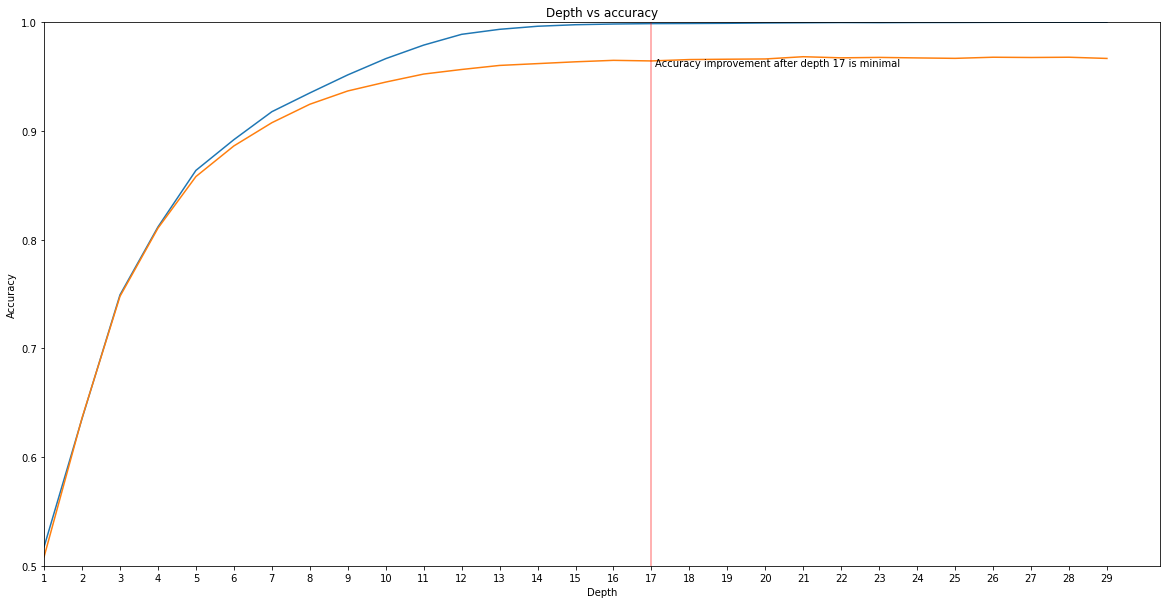

In [26]:
x = train_acc_at_depth.keys()
train_y = train_acc_at_depth.values()
val_y = val_acc_at_depth.values()
fig = plt.figure(figsize=(20,10))
plt.plot(x,train_y)
plt.plot(x,val_y)
plt.axvline(x=17, ymin=0, ymax=1, color = 'r', alpha = 0.4)
plt.text(17.1, 0.96, "Accuracy improvement after depth 17 is minimal")
plt.xlim(left=13)
plt.ylim(bottom=0.5, top = 1)
plt.title("Depth vs accuracy")
plt.xticks(np.arange(1, 30, 1))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()

The graph above only examines the range between acciracies 0.9-0.97. We can now see that after depth 17, the accuracy of the classifier does not really improve by much. Hence, we chose depth = 17 for our random forest classifier.

### Impurity measure
We will use k-fold cross valudation to check if gini or entropy is best as impurity measure.

In [25]:
clf = RandomForestClassifier(criterion = 'gini', max_depth = 17)
cross_val_score_gini = np.mean(cross_val_score(clf, X_train_val_2d, y_train_val))
print(cross_val_score_gini)
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 17)
cross_val_score_entropy = np.mean(cross_val_score(clf, X_train_val_2d, y_train_val))
print(cross_val_score_entropy)

0.9657460317460318


KeyboardInterrupt: 

In [ ]:
diff_percentage = (np.abs(cross_val_score_gini-cross_val_score_entropy)/ ((cross_val_score_entropy+cross_val_score_gini)/2)) *100
print("Accuracy difference between gini and entropy:", "%.2f" % diff_percentage, "%")

While entropy has slightly higher accuracy than gini, the difference is only 0.05%. Since gini requires less computation than entropy, it will be chosen as impurity measure.


### Number of trees
Now we will take a look at the optimal number of trees required. First we will iterate over 10 segments of 50, to get a rough idea of where the optimal number of trees lies.

In [27]:
val_acc_ntrees = {} # Dictionary for keeping track of number of trees and accuracy
train_acc_ntrees = {} # Dictionary for keeping track of number of trees and accuracy

for i in range(50, 400, 50):
    clf = RandomForestClassifier(n_estimators = i, criterion = 'gini', max_depth = 17)
    clf.fit(X_train_2d, y_train)
    train_score = clf.score(X_train_2d, y_train)
    val_score = clf.score(X_val_2d, y_val)
    print("Precision at tree number", i , "is val:", val_score, " train:", train_score)
    val_acc_ntrees[i] = val_score
    train_acc_ntrees[i] = train_score 

Precision at tree number 50 is: 0.964047619047619
Precision at tree number 100 is: 0.9646031746031746
Precision at tree number 150 is: 0.9665873015873016
Precision at tree number 200 is: 0.966031746031746
Precision at tree number 250 is: 0.9665873015873016
Precision at tree number 300 is: 0.9676190476190476
Precision at tree number 350 is: 0.9665079365079365


dict_keys([50, 100, 150, 200, 250, 300, 350])
dict_values([0.964047619047619, 0.9646031746031746, 0.9665873015873016, 0.966031746031746, 0.9665873015873016, 0.9676190476190476, 0.9665079365079365])


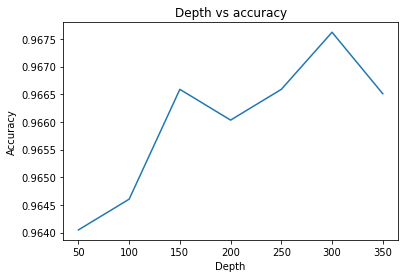

In [28]:
x = val_acc_ntrees.keys()
val_y = val_acc_ntrees.values()
train_y train_acc_ntrees.values()
print(x)
print(val_y)
print(train_y)
#fig = plt.figure(figsize=(20,10))
plt.plot(x,y)
#plt.axvline(x=17, ymin=0, ymax=1, color = 'r', alpha = 0.4)
#plt.text(17.1, 0.96, "Accuracy improvement after depth 17 is minimal")
#plt.xlim(left=13)
#plt.ylim(bottom=0.9, top = 0.97)
plt.title("Depth vs accuracy")
#plt.xticks(np.arange(1, 30, 1))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()

In [29]:
val_acc_ntrees2 = {} # Dictionary for keeping track of number of trees and accuracy
train_acc_ntrees2 = {} # Dictionary for keeping track of number of trees and accuracy
runtime_ntrees = {}
for i in range(25, 400, 25):
    clf = RandomForestClassifier(n_estimators = i, criterion = 'gini', max_depth = 17)
    start = timeit.default_timer()
    clf.fit(X_train_2d, y_train)
    stop = timeit.default_timer()
    #print('Runtime for trees', i, " is:", stop - start, "seconds")  
    runtime_ntrees[i] = stop - start
    val_score = clf.score(X_val_2d, y_val)
    train_score = clf.score(X_train_2d, y_train)
    print("Precision at tree number", i , "is val:", val_score, " train:", train_score)
    val_acc_ntrees2[i] = val_score 
    train_acc_ntrees2[i] = train_score

Precision at tree number 25 is: 0.9581746031746031
Precision at tree number 50 is: 0.964047619047619
Precision at tree number 75 is: 0.9648412698412698
Precision at tree number 100 is: 0.964047619047619
Precision at tree number 125 is: 0.966031746031746
Precision at tree number 150 is: 0.9665873015873016
Precision at tree number 175 is: 0.9673809523809523
Precision at tree number 200 is: 0.967936507936508
Precision at tree number 225 is: 0.9673015873015873
Precision at tree number 250 is: 0.9669047619047619
Precision at tree number 275 is: 0.9661111111111111
Precision at tree number 300 is: 0.9671428571428572
Precision at tree number 325 is: 0.9676984126984127
Precision at tree number 350 is: 0.9673015873015873
Precision at tree number 375 is: 0.9669047619047619


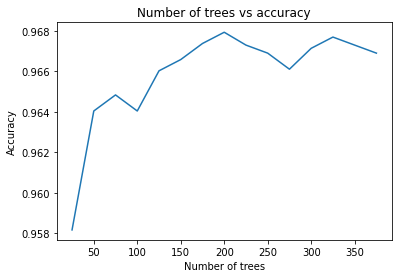

In [30]:
x = val_acc_ntrees2.keys()
val_y = val_acc_ntrees2.values()
train_y = train_acc_ntrees2.values()
plt.plot(x,val_y)
plt.plot(x,train_y)
plt.title("Number of trees vs accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')
plt.show()

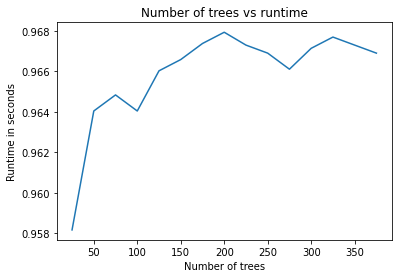

In [31]:
r_x = runtime_ntrees.keys()
r_y = runtime_ntrees.values()
plt.plot(x,y)
plt.title("Number of trees vs runtime")
plt.ylabel('Runtime in seconds')
plt.xlabel('Number of trees')
plt.show()

### Maximum features

In [32]:
val_nfeatures_acc = {}
train_nfeatures_acc = {}
runtime_nfeatures = {}
for i in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    clf = RandomForestClassifier(n_estimators = 125, criterion = 'gini', max_depth = 17, max_features = i)
    start = timeit.default_timer()
    clf.fit(X_train_2d, y_train)
    stop = timeit.default_timer()
    runtime_nfeatures[i] = stop - start
    val_score = clf.score(X_val_2d, y_val)
    train_score = clf.score(X_train_2d, y_train)
    print("Precision at", i , "features is val:", val_score, " train:", train_score)
    val_nfeatures_acc[i] = val_score
    train_nfeatures_acc[i] = train_score 

Precision at 1 features is val: 0.9288888888888889  train: 0.9735119047619047
Precision at 2 features is val: 0.943015873015873  train: 0.9890873015873016
Precision at 4 features is val: 0.954047619047619  train: 0.9970039682539683
Precision at 8 features is val: 0.9614285714285714  train: 0.9986309523809523
Precision at 16 features is val: 0.9653174603174604  train: 0.9989484126984127
Precision at 32 features is val: 0.966984126984127  train: 0.9987698412698413
Precision at 64 features is val: 0.9661904761904762  train: 0.9980357142857142
Precision at 128 features is val: 0.9653174603174604  train: 0.9973015873015874
Precision at 256 features is val: 0.9632539682539683  train: 0.9966071428571428
Precision at 512 features is val: 0.9608730158730159  train: 0.9964087301587301


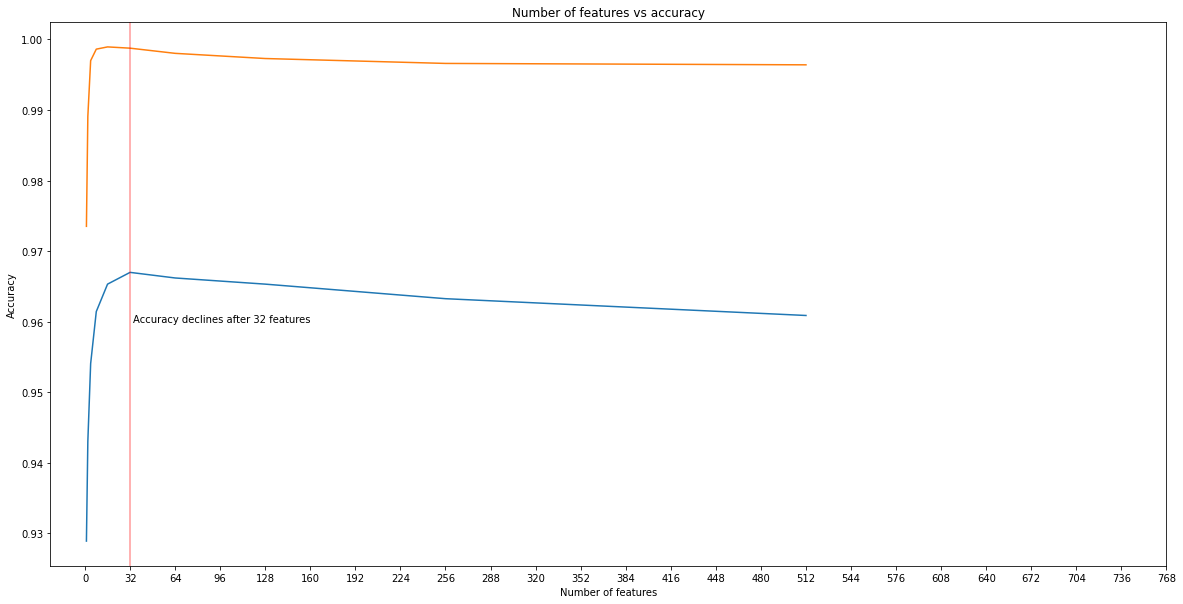

In [33]:
nfeatures_x = val_nfeatures_acc.keys()
val_nfeatures_y = val_nfeatures_acc.values()
train_nfeatures_y = train_nfeatures_acc.values()
fig = plt.figure(figsize=(20,10))
plt.plot(nfeatures_x,val_nfeatures_y)
plt.plot(nfeatures_x,train_nfeatures_y)
plt.title("Number of features vs accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.ylim(bottom=0.5, top = 1)
plt.axvline(x=32, ymin=0, ymax=1, color = 'r', alpha = 0.4)
plt.text(34, 0.96, "Accuracy declines after 32 features")
plt.xticks(np.arange(0, 782, 32))
plt.show()

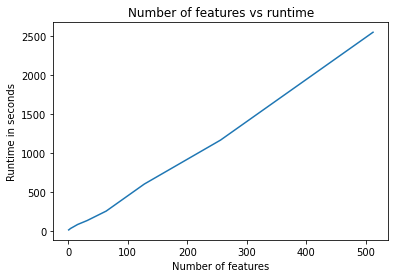

In [34]:
r_x = runtime_nfeatures.keys()
r_y = runtime_nfeatures.values()
plt.plot(r_x,r_y)
plt.title("Number of features vs runtime")
plt.ylabel('Runtime in seconds')
plt.xlabel('Number of features')
plt.show()

In [36]:
val_nfeatures2_acc = {}
train_nfeatures2_acc = {}
for i in range(16, 64, 4):
    clf = RandomForestClassifier(n_estimators = 125, criterion = 'gini', max_depth = 17, max_features = i)
    clf.fit(X_train_2d, y_train)
    val_score = clf.score(X_val_2d, y_val)
    train_score = clf.score(X_train_2d, y_train)
    print("Precision at", i , "features is val:", val_score, " train:", train_score)
    val_nfeatures2_acc[i] = val_score 
    train_nfeatures2_acc[i] = train_score 

Precision at 16 features is val: 0.9639682539682539  train: 0.998968253968254
Precision at 20 features is val: 0.9654761904761905  train: 0.9988690476190476
Precision at 24 features is val: 0.9664285714285714  train: 0.9987698412698413
Precision at 28 features is val: 0.9647619047619047  train: 0.998829365079365
Precision at 32 features is val: 0.966031746031746  train: 0.9985912698412699
Precision at 36 features is val: 0.9670634920634921  train: 0.9984722222222222
Precision at 40 features is val: 0.9668253968253968  train: 0.9985515873015873
Precision at 44 features is val: 0.9663492063492064  train: 0.9984920634920635
Precision at 48 features is val: 0.9653174603174604  train: 0.998234126984127
Precision at 52 features is val: 0.9656349206349206  train: 0.9982142857142857
Precision at 56 features is val: 0.9657936507936508  train: 0.998234126984127
Precision at 60 features is val: 0.9661111111111111  train: 0.9980357142857142


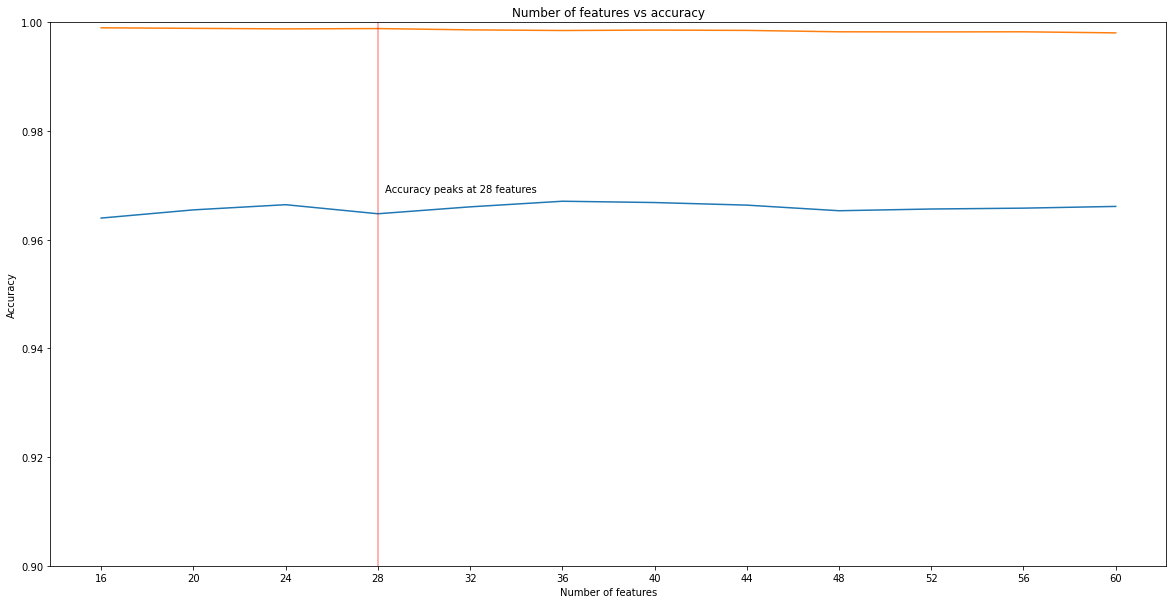

In [40]:
nfeatures2_x = val_nfeatures2_acc.keys()
val_nfeatures2_y = val_nfeatures2_acc.values()
train_nfeatures2_y = train_nfeatures2_acc.values()
fig = plt.figure(figsize=(20,10))
plt.plot(nfeatures2_x,val_nfeatures2_y)
plt.plot(nfeatures2_x,train_nfeatures2_y)
plt.title("Number of features vs accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.ylim(bottom=0.9, top = 1)
plt.axvline(x=28, ymin=0, ymax=1, color = 'r', alpha = 0.4)
plt.text(28.3, 0.9688, "Accuracy peaks at 28 features")
plt.xticks(np.arange(16, 64, 4))
plt.show()

## Convolutional Neural Network (LeNet-5)

In [ ]:
# Preprocessing

# convert label data to one-hot encoding
print(X_train.shape)
print(X_val.shape)
X_train_4d = X_train.reshape(56700, 28, 28, 1)
X_val_4d = X_val.reshape(6300, 28, 28, 1)
y_train_onehot = np_utils.to_categorical(y_train, 10)
y_val_onehot = np_utils.to_categorical(y_val, 10)

In [ ]:
# Initialize an empty sequential model
LeNet_model = Sequential()

# Convolutional Layer
LeNet_model.add(Conv2D(filters = 6, kernel_size=(3, 3), strides=(1, 1), activation= 'tanh', input_shape=(28,28,1), padding= 'same'))

# Pooling
LeNet_model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding= 'valid'))

#Convolutional Layer
LeNet_model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation= 'tanh', padding= 'valid'))

# Pooling
LeNet_model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding= 'valid'))

# Connected Convolutional Layer
LeNet_model.add(Conv2D(120, kernel_size=(3, 3), strides=(1, 1), activation= 'tanh', padding= 'valid'))

# Flattening
LeNet_model.add(Flatten())

# Fully Connected Layer
LeNet_model.add(Dense(84, activation= 'tanh'))

#Output Layer with softmax activation
LeNet_model.add(Dense(10, activation= 'softmax'))

# Compile the model
LeNet_model.compile(loss= 'categorical_crossentropy', optimizer= 'SGD', metrics=['accuracy']) 

In [ ]:
# Test run of LeNet-5 model
batch_size = 32
epocs = 10

LeNet_model.fit(X_train_4d, y_train_onehot, validation_data=(X_val_4d, y_val_onehot), batch_size = batch_size, epochs = epocs, verbose = 1)
